<a href="https://colab.research.google.com/github/IT-Vyavasay/CRUD_WITH_LOGIN/blob/main/DECA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reference source
https://github.com/YadiraF/DECA  
https://github.com/cedro3/DECA  

Thank you.

In [ ]:
# ライブラリー取得
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install pytorch3d

# githubからコードを取得
!git clone https://github.com/YadiraF/DECA.git
%cd DECA
!pip install -r requirements.txt

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0MB 25kB/s 
     |████████████████████████████████| 5.9MB 9.5MB/s 
  Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101
  Found existing installation: torchvision 0.8.2+cu101
    Uninstalling torchvision-0.8.2+cu101:
      Successfully uninstalled torchvision-0.8.2+cu101
     |████████████████████████████████| 30.0MB 111kB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 645kB 48.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210227-cp37-none-any.whl size=59001 sha256=a98e5ad8424ab4ace5af77b02b0ad09bffbd49c80b205281400ff6e51d94f795
  Stored in directory: /root/.cache/pip/wheels/89/4b/64/716bf9925b2bb322cf85281e7d34d36542847c544a85182d05
  Created wheel for iopath: filename=iopath-0.1.4-cp37-none-any.whl size=15571 sha256=ceca59e3d3b

In [ ]:
# Google drive から必要なデータをダウンロードし、dataフォルダーにコピーする
import requests
import zipfile

def download_file_from_google_drive(id, destination):

       # ダウンロード画面のURL
       URL = "`"

       session = requests.Session()

       response = session.get(URL, params = { 'id' : id }, stream = True)
       token = get_confirm_token(response)

       if token:
           params = { 'id' : id, 'confirm' : token }
           response = session.get(URL, params = params, stream = True)

       save_response_content(response, destination)

def get_confirm_token(response):
       for key, value in response.cookies.items():
           if key.startswith('download_warning'):
               return value

       return None

def save_response_content(response, destination):
       CHUNK_SIZE = 32768

       with open(destination, "wb") as f:
           for chunk in response.iter_content(CHUNK_SIZE):
               if chunk: # filter out keep-alive new chunks
                   f.write(chunk)

if __name__ == "__main__":
       file_id = 'TAKE ID FROM SHAREABLE LINK'
       destination = './deca.zip'  # 保存先パスの指定
       download_file_from_google_drive(file_id, destination)

       # zipファイル解凍
       zipf = zipfile.ZipFile('./deca.zip')
       zipf.extractall('./data')
       zipf.close()

In [ ]:
!python demos/demo_reconstruct.py -i TestSamples/examples --saveDepth True --saveObj True

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

total 9 images
Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:03<00:00, 24.2MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4_1.6-c827573f02.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4_1.6-c827573f02.zip
100% 91.9M/91.9M [00:03<00:00, 24.2MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:03<00:00, 27.3MB/s]
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.

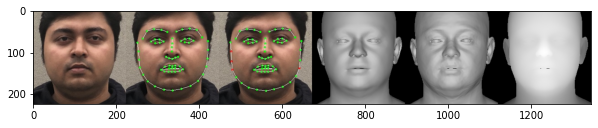

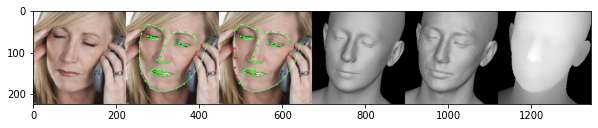

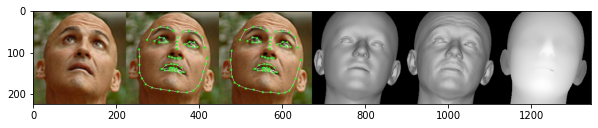

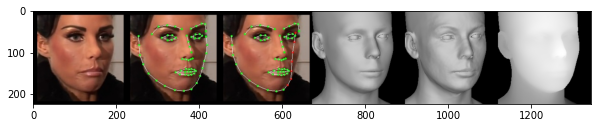

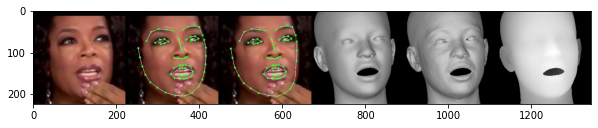

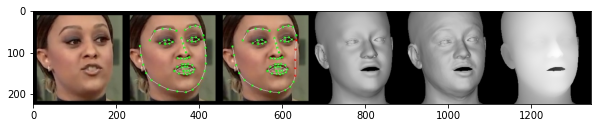

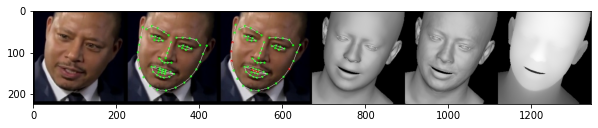

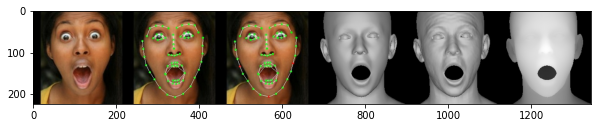

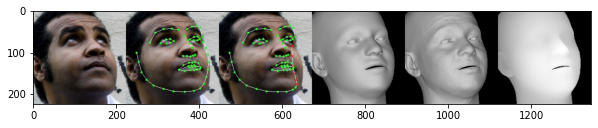

In [ ]:
# display demo_reconstruct
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

files = sorted(glob.glob('./TestSamples/examples/results/*.jpg'))
for file in files:
     fig = plt.figure(figsize=(10,2))
     img = cv2.imread(file)
     img_RGB = img[:, :, ::-1]
     plt.imshow(img_RGB)
     plt.show()

In [ ]:
!python demos/demo_teaser.py

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

total 3 images
total 9 images
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/DECA/data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".fo

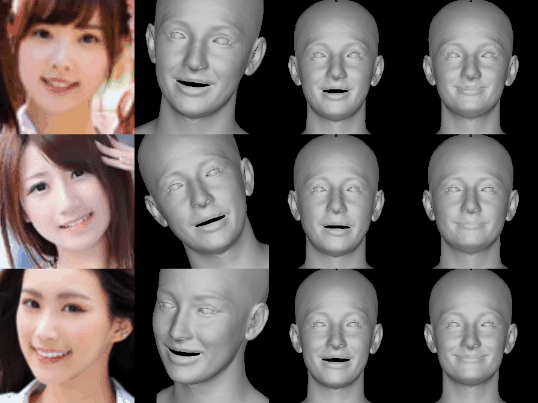

In [ ]:
# display demo_teaser
from IPython.display import Image
Image('./TestSamples/teaser/results/teaser.gif', format='png')